In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading DataFrame
mushroom_df = pd.read_csv(r"C:/Users/swati/Downloads/dataset1-master/dataset1-master/mushrooms.csv")
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom_df.tail(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
## Check size of the dataframe:-

mushroom_df.shape

(8124, 23)

In [5]:
## checking about column data types and null entries:-

mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All columns types are object,since Machine learning models don't take object/String type values.so apply some encoding 
techniques.Here I am usimg LabelEncoder to encode.

In [5]:
lec = LabelEncoder()
mushroom_df[
    ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size',
             'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
             'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type', 
             'spore-print-color','population' ,'habitat']] = mushroom_df[
    ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size', 'gill-color','stalk-shape','stalk-root',
             'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
            'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
             'spore-print-color','population' ,'habitat']].apply(lec.fit_transform)

In [21]:
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,e,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,e,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,p,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [6]:
mushroom_df['class'] = mushroom_df['class'].replace({'p':0,'e':1}) 

In [7]:
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,1,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,1,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,0,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [24]:
### Check meta data
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,1.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


<AxesSubplot:>

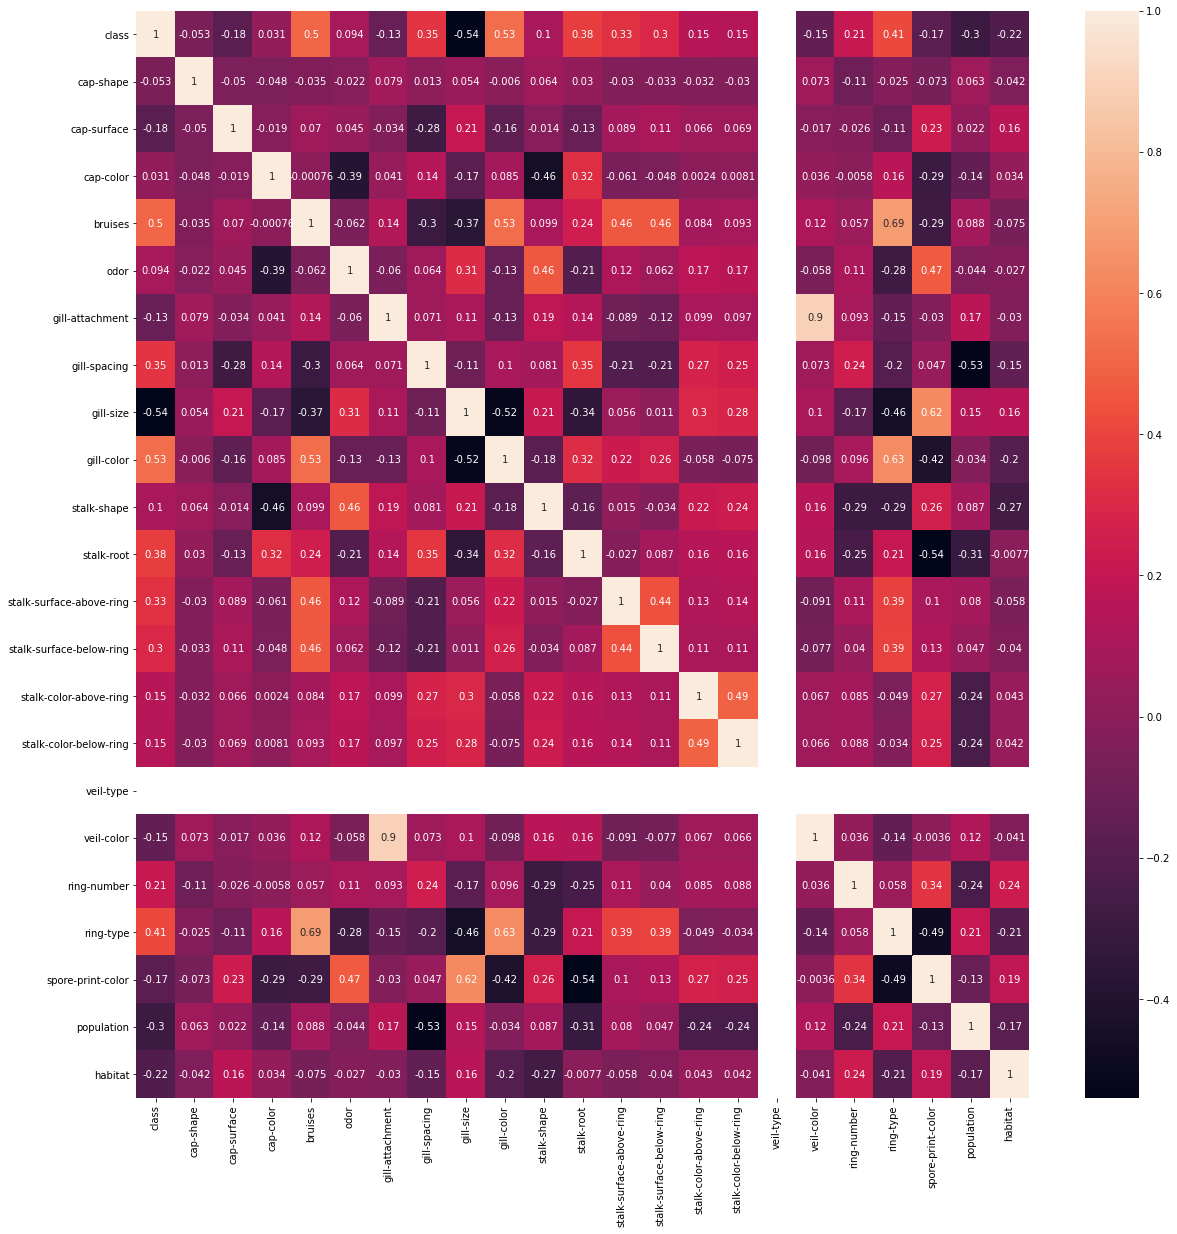

In [8]:
## Feature Selection Process:
plt.figure(figsize=(20,20))
sns.heatmap(mushroom_df.corr(),annot =True)

In [9]:
### Deleting columns which have more than 60% correlation with each other not with thh target variable.
def correlation(dataset,threshold):
    data_corr = set()
    data_matrix = dataset.corr()
    for i in range(len(data_matrix.columns)):
        for j in range(i):
            if (data_matrix.iloc[i,j]) > threshold:
                column_name =data_matrix.columns[i]
                data_corr.add(column_name)
    return  data_corr
corr_features = correlation(mushroom_df.iloc[:,:22],0.6)
print("Number of corelated features are :", len(set(corr_features)))
print("features to be deleted are :  ", corr_features)

Number of corelated features are : 3
features to be deleted are :   {'ring-type', 'spore-print-color', 'veil-color'}


In [10]:
## Deleting columns ring-type, spore-print-color, veil-color
mushroom_df.drop(['ring-type','spore-print-color','veil-color'],axis =1,inplace = True)

In [11]:
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,population,habitat
0,0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,1,3,5
1,1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,1,2,1
2,1,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,1,2,3
3,0,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,1,3,5
4,1,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,2
8120,1,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,2
8121,1,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,2
8122,0,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,1,4,2


In [24]:
## Renaming class column as target column :
mushroom_df.rename(columns = {'class': 'target'},inplace = True )

In [25]:
mushroom_df

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,population,habitat
0,0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,1,3,5
1,1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,1,2,1
2,1,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,1,2,3
3,0,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,1,3,5
4,1,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,2
8120,1,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,2
8121,1,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,2
8122,0,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,1,4,2


In [28]:
## Checking those columns,which are less correlated with target variable :
corr_matrix = mushroom_df.corr()
print(corr_matrix['target'].sort_values())



gill-size                  -0.540024
population                 -0.298686
habitat                    -0.217179
cap-surface                -0.178446
gill-attachment            -0.129200
cap-shape                  -0.052951
cap-color                   0.031384
odor                        0.093552
stalk-shape                 0.102019
stalk-color-below-ring      0.146730
stalk-color-above-ring      0.154003
ring-number                 0.214366
stalk-surface-below-ring    0.298801
stalk-surface-above-ring    0.334593
gill-spacing                0.348387
stalk-root                  0.379361
bruises                     0.501530
gill-color                  0.530566
target                      1.000000
veil-type                        NaN
Name: target, dtype: float64


In [30]:
## Deleting those columns which have correlation between -0.1 to 0.1,Those columns are: - cap-surface,gill-attachment,cap-shape
 corr_matrix.drop(corr_matrix[(corr_matrix.values > - 0.1)  & (corr_matrix.values < 0.1)].index,inplace =True)


In [35]:
new_data = mushroom_df.columns[mushroom_df.columns.isin(corr_matrix.index)]
print((new_data))

Index(['veil-type'], dtype='object')


In [38]:
## From the above correlation matrix  cap-shape,cap-color ,veil-type,are columns which have less correlation with target variable that is between 
## -0.1 to 0.1
mushroom_df.drop(['cap-shape','cap-color',],axis=1,inplace=True)

mushroom_df.shape

KeyError: "['cap-shape' 'cap-color'] not found in axis"

In [39]:
mushroom_df.drop(['veil-type'],axis=1,inplace =True)
mushroom_df.shape

(8124, 17)

In [42]:
mushroom_df.target.value_counts()

1    4208
0    3916
Name: target, dtype: int64

Dataset is not imbalanced.

In [43]:
## SelectKBest use f_classif function to find best features.
X = mushroom_df.drop(['target'],axis=1)
y =mushroom_df['target']

In [53]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif, k =10)
data_fit =best_features.fit(X,y)
scores = pd.DataFrame(data_fit.scores_)
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns,scores],axis=1) 
feature_scores.columns = ['Feature_Name','Score']
features_to_take = feature_scores.nlargest(10,'Score')
print(features_to_take)


                Feature_Name        Score
5                  gill-size  3343.700439
6                 gill-color  3182.110596
1                    bruises  2729.510254
8                 stalk-root  1365.373901
4               gill-spacing  1121.971924
9   stalk-surface-above-ring  1023.906250
10  stalk-surface-below-ring   796.237427
14                population   795.558777
15                   habitat   402.052460
13               ring-number   391.206696


In [54]:
new_features = mushroom_df[features_to_take['Feature_Name']]
new_features

,gill-size,gill-color,bruises,stalk-root,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,habitat,ring-number
0,1,4,1,3,0,2,2,3,5,1
1,0,4,1,2,0,2,2,2,1,1
2,0,5,1,2,0,2,2,2,3,1
3,1,5,1,3,0,2,2,3,5,1
4,0,4,0,3,1,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
8119,0,11,0,0,0,2,2,1,2,1
8120,0,11,0,0,0,2,2,4,2,1
8121,0,5,0,0,0,2,2,1,2,1
8122,1,0,0,0,0,2,1,4,2,1


In [58]:
### Model Building
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(new_features)
x_train,x_test,y_train,y_test = train_test_split(X_scaler,y,random_state=30,test_size = 0.25)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred =knn.predict(x_test)


In [59]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 933,    0],
       [   0, 1098]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      1.00      1.00      1098

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [64]:
## Cross Validation to check if model is overfitting:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_scaler,y,cv=5)


array([0.84246154, 1.        , 0.95384615, 1.        , 0.5       ])

In [65]:
cross_val_score(knn,X_scaler,y,cv=5).mean()


0.8592615384615385

This shows that our model is not overfitting.

In [66]:
## Model building using DecisionTree 
from sklearn.tree import DecisionTreeClassifier

dtcf = DecisionTreeClassifier()
dtcf.fit(x_train,y_train)    

DecisionTreeClassifier()

In [69]:
y_pred = dtcf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [70]:
## Cross Validation to check if model is overfitting:
from sklearn.model_selection import cross_val_score
cross_val_score(dtcf,X_scaler,y,cv=5)



array([0.83507692, 1.        , 0.98523077, 1.        , 0.63793103])

In [71]:
cross_val_score(dtcf,X_scaler,y,cv=5).mean()


0.8975590754073511

In [72]:
## Model buildimg using logistic Regression :
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred)

0.9394387001477105

In [75]:
## Model buildimg using Random Forest Classifier  :
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred)

1.0

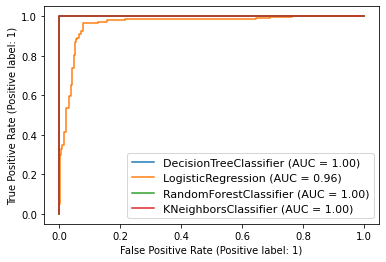

In [79]:
###Plotting ROC AUC Curve:
disp =plot_roc_curve(dtcf,x_test,y_test)   
plot_roc_curve(lr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()


From above we can choose KNN,Decision Tree or Random Forest Algorithm for this data set.

In [80]:
## Model saving :
filename = 'Mushroom_classification_model.pickle'
pickle.dump(knn,open(filename,'wb'))